### Frequencies 

This juypyter notebook contains code for calculating:
* Yearly Frequency of unique companies mentioned in DNA articles
* Top 20 total companies mentioned in DNA
* Top 20 publishers mentioned in  DNA 

In [5]:
import gzip
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
import matplotlib.colors
from collections import Counter
from itertools import chain
from datetime import datetime as dt
from nltk import FreqDist
#nltk.download('punkt')
import xlrd

In [6]:
# Reading in the DNA data
dna = pd.read_json('../data/original/DNA_DATA_FULL.gz', compression='gzip')
dictionary = pd.read_csv("../data/original/companies.csv") 

FileNotFoundError: [Errno 2] No such file or directory: '../data/original/DNA_DATA_FULL.gz'

#### Converting datetime string to date 

In [4]:
date = [dt.fromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S') for dates in dna['publication_date']]
pd.to_datetime(date)
dna['year'] = pd.DatetimeIndex(date).year

In [5]:
dna.shape

(1942855, 36)

In [ ]:
# Create subsets by year
#dna2013 = dna[dna['Year'] == '2013']
#making a loop for each year
#for i in range (2013, 2018):
#    dna_year= dna[dna['Year'] == str(i)]
 #   dna_year.to_csv("../data/working/DNA_" + str(i))

### Heading on what is going on here

In [5]:
# Reading in the subsets
dna_13 = pd.read_csv("../data/working/DNA_2013.csv")
dna_14 = pd.read_csv("../data/working/DNA_2014.csv")
dna_15 = pd.read_csv("../data/working/DNA_2015.csv")
dna_16 = pd.read_csv("../data/working/DNA_2016.csv")
dna_17 = pd.read_csv("../data/working/DNA_2017.csv")
dna_18 = pd.read_csv("../data/working/DNA_2018.csv")

In [67]:
dna['non_duplicates'] = [set(code) for code in dna['company_codes'].str.split(",")] #creates an empty set, goes through each row in company_codes and splits the string in each row by the comma adds each company code and adds company code to set 
dna['non_duplicates'] = [list(code) for code in dna['non_duplicates']] #makes the 
dna['non_duplicates'] = [','.join(code) for code in dna['non_duplicates']]
dna['non_duplicates'] = dna['non_duplicates'].str[1:]
dna[['company_codes', 'non_duplicates']]

,company_codes,non_duplicates
0,",toamsi,toamsi,tosmsc,tosmsc,tshba,tshba,tshba,","tosmsc,toamsi,tshba"
1,",irevs,irevs,irevs,",irevs
2,",euruno,",euruno
3,",retrac,nyse,nyse,retrac,retrac,seexc,","seexc,retrac,nyse"
4,",brstmy,brstmy,brstmy,",brstmy
...,...,...
1942850,",egalcu,egalcu,egalcu,seexc,","seexc,egalcu"
1942851,",endoph,schplo,endoph,endoph,jnsspi,jnsspi,jon...","schplo,seexc,jnsspi,jonjon,endoph"
1942852,",amchso,",amchso
1942853,",grnlft,kalamc,stry,stry,stry,","stry,kalamc,grnlft"


In [68]:
dna_subset=dna_subset[:1000]
dna_subset

,copyright,subject_codes,art,modification_datetime,body,company_codes_occur,company_codes_about,company_codes_lineage,snippet,publication_date,...,title,publication_datetime,publisher_name,action,document_type,section,dateline,year,non-duplicates,non_duplicates
0,"(c) Copyright 2014 Obesity, Fitness & Wellness...",",grdly,gscho,nnam,ccat,gcat,gedu,ghea,gtrea,nc...",,1391132355000,"""When we decided to purchase new ultrasound eq...",",tshba,tosmsc,toamsi,",",tshba,",,2014 FEB 8 (NewsRx) -- By a News Reporter-Staf...,1391817600000,...,"Toshiba America Medical Systems, Inc. Arizona ...",1391817600000,NewsRx.com,add,article,NaN,NaN,2014,"tosmsc,toamsi,tshba","tosmsc,toamsi,tshba"
1,© 2014 The Advisory Board Company. All rights ...,",nabst,cempbn,c42,ccat,cwrkpa,ncat,nfact,nfcpin,",,1390496727000,A similar ban already applies to self-insured ...,",irevs,",",irevs,",,The Internal Revenue Service last week signale...,1390262400000,...,IRS Delaying ACA's Equal-Coverage Provision fo...,1390262400000,The Advisory Board Company/American Health Line,add,article,NaN,NaN,2014,irevs,irevs
2,© Copyright 2014 Clinical Trials Week via News...,",c23,ctrial,gcancr,gcrese,gsci,c22,ccat,gcat,g...",,1390525806000,Dr. Curiel is the leader for TumAdoR Project 6...,,,,2014 JAN 27 (NewsRx) -- By a News Reporter-Sta...,1390780800000,...,Clinical Trials and Studies; Broad-spectrum ca...,1390780800000,NewsRx.com,add,article,NaN,NaN,2014,euruno,euruno
3,© Copyright 2018 Journal of Engineering via Ve...,",c151,c15,ccat,ncat,nfact,nfcpin,",,1523916466000,Cost of manufactured product increased $4.7 mi...,",retrac,nyse,",",retrac,",,2018 APR 16 (VerticalNews) -- By a News Report...,1523836800000,...,Retractable Technologies Inc. Retractable Tech...,1523836800000,"NewsRX, LLC",add,article,,NaN,2018,"seexc,retrac,nyse","seexc,retrac,nyse"
4,© Copyright 2017 Pharma Business Week via News...,",ctmark,cgymtr,ccat,cinprp,",,1499725044000,The international trademark goods and services...,",brstmy,",",brstmy,",,2017 JUL 10 (NewsRx) -- By a News Reporter-Sta...,1499644800000,...,Pharmaceutical Companies; An Application for t...,1499644800000,"NewsRX, LLC",add,article,,NaN,2017,brstmy,brstmy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"© Copyright 2015 Obesity, Fitness & Wellness W...",,,1440799781000,Our news editors obtained a quote from the res...,",nthun,",",nthun,",,2015 SEP 5 (NewsRx) -- By a News Reporter-Staf...,1440720000000,...,Cardiovascular Research; Study Results from No...,1440720000000,"NewsRX, LLC",add,article,NaN,NaN,2015,"nthun,biomce","nthun,biomce"
996,(c) 2016. Theflyonthewall.com. All Rights Res...,",c151,ctrial,nrmf,c15,c23,ccat,ncat,nfact,nfce...",,1470946360000,We believe we are developing edasalonexent in...,",ctbiph,",",ctbiph,",,16:12 EDT Catabasis Pharmaceuticals reports Q2...,1470873600000,...,16:12 EDT Catabasis Pharmaceuticals reports Q2...,1470873600000,Theflyonthewall.com,add,article,,NaN,2016,ctbiph,ctbiph
997,(c) 2015. Theflyonthewall.com. All Rights Res...,",c15,ccat,ncat,nfact,nfcpin,",,1446673637000,NaN,",xenp,",",xenp,",,Charge recorded as part of restructuring to fo...,1446595200000,...,XenoPort says recorded $3M restructuring charg...,1446595200000,Theflyonthewall.com,add,article,NaN,NaN,2015,xenp,xenp
998,Copyright 2016. News Bites Pty Ltd.,",cdirdl,c18,c41,cactio,ccat,ncat,nfact,nfcpex,...",,1470810456000,HTTP link to original article\n\nhttps://www.s...,",trizet,sybse,nasdaq,mtpaia,flems,cohrnt,",",cohrnt,",,"NEWS BITES - PEOPLE IN BUSINESS\n\nDirector, C...",1470787200000,...,Coherent director L. William Krause sells 09 A...,1470787200000,News Bites Pty Ltd (Europe),add,article,,NaN,2016,"sybse,cohrnt,nasdaq,trizet,mtpaia,flems","sybse,cohrnt,nasdaq,trizet,mtpaia,flems"


In [ ]:
dna_13['non-duplicates'] = [set(code) for code in dna_13['company_codes'].str.split(",")]
dna_13['non-duplicates'] = [list(code) for code in dna_13['non-duplicates']]
dna_13['non-duplicates'] = [','.join(code) for code in dna_13['non-duplicates']]
dna_13['non-duplicates'] = dna_13['non-duplicates'].str[1:]
dna_13[['company_codes', 'non-duplicates']]

In [22]:
company_codes_per_year = dna.groupby(['year'])['non-duplicates'].value_counts()
company_codes_per_year

year  non-duplicates             
2012                                 122
      jonjon,usfda                     5
      jonjon,pblczn,usfda              4
      hrvun                            3
      lilye                            3
                                    ... 
2018  zzlare,staban,dibjof,nrdkxn      1
      zzlare,staban,mrelfz,dibjof      1
      zzpoin,frbo,medinc               1
      zzsong                           1
      zzxbnp,glxo                      1
Name: non-duplicates, Length: 640623, dtype: int64

In [1]:
# Top 20 companies (or group of comapnies) in total and by year
#NOT the right one
#dna['non-duplicates'].value_counts()[:20].plot(kind='barh')
#plt.xlabel('Frequency', fontsize=16)
#plt.ylabel('Company codes', fontsize=16)
#plt.title('Top 20 companies in the DNA data',fontsize=20)
#plt.show()

### Creating Top 20 Companies Histogram

In [43]:
# Top 20 individual companies in the dataset
code = dna_subset['company_codes'].str.lower().str.cat(sep=' ') #
words = nltk.tokenize.word_tokenize(code) #what are you doing here? why is it necessary
word_dist = nltk.FreqDist(words) #what are you doing here?
#print (word_dist)
rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['code', 'frequency'])
rslt = rslt[rslt.code !=','] #what does this code do?
rslt

,code,frequency
1,seexc,300
2,usfda,265
3,pfiz,99
4,nasdaq,93
5,sndoz,54
6,zenec,52
7,wtsnph,48
8,brstmy,47
9,lilye,41
10,sansyn,39


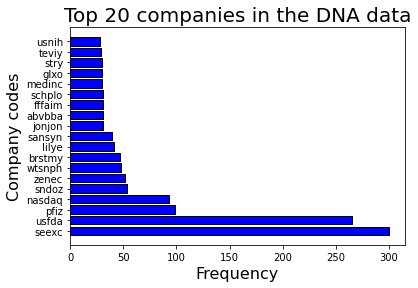

In [28]:
#pos = np.arange(len(rslt.code))
plt.barh(rslt.code,rslt.frequency,color='blue',edgecolor='black')
plt.yticks(rslt.code)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Company codes', fontsize=16)
plt.title('Top 20 companies in the DNA data',fontsize=20)
plt.show()

### Top 20 Publishers in total and by year

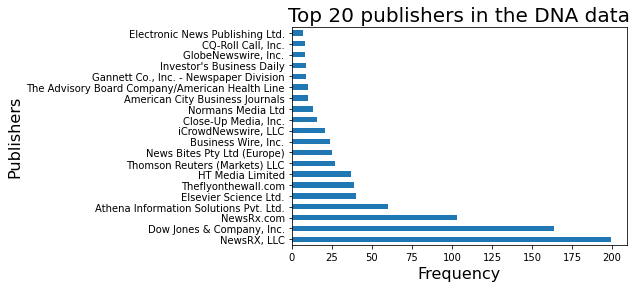

In [9]:
# Top 20 publishers in total and by year
dna_subset['publisher_name'].value_counts()[:20].plot(kind='barh')
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Publishers', fontsize=16)
plt.title('Top 20 publishers in the DNA data',fontsize=20)
plt.show()

In [57]:
## Number of publishers per year
#pub=dna_subset['publisher_name'].unique()
#print(len(pub))
#num_publisher = dna['publisher_name'].nunique(dropna= True)
#num_publisher
p = pd.value_counts(dna.publisher_name)
publisher = pd.Series({'nunique': len(p), 'unique values': p.index.tolist()})
p.append(publisher)

NewsRX, LLC                                                                          347341
Dow Jones & Company, Inc.                                                            309754
NewsRx.com                                                                           228707
Athena Information Solutions Pvt. Ltd.                                               118669
Theflyonthewall.com                                                                   81326
                                                                ...                        
The Maui Time Weekly, Inc.                                                                1
Wenatchee Business Journal, Inc.                                                          1
Societe Orientale de Publicite                                                            1
nunique                                                                                1426
unique values                             [NewsRX, LLC, Dow Jones & Company, Inc

In [5]:
# For each publisher, how many articles overall and per year? (table)
#count=dna_subset.groupby('publisher_name')['an'].nunique(dropna= True)
#count
article_by_publisher = dna.groupby(['publisher_name'])['an'].count().sort_values(ascending=False)
article_by_publisher

publisher_name
NewsRX, LLC                                  347341
Dow Jones & Company, Inc.                    309754
NewsRx.com                                   228707
Athena Information Solutions Pvt. Ltd.       118669
Theflyonthewall.com                           81326
                                              ...  
Asianet Satellite Communications Pvt Ltd.         1
Valor Economico S.A.                              1
Sourcing Partners                                 1
LLC Georgia Media Incorporated                    1
Le Monde Interactif                               1
Name: an, Length: 1426, dtype: int64

Number of articles per year

Text(0.5, 1.0, 'Number of articles per year')

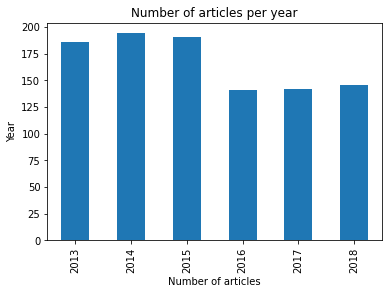

In [19]:
#dna_subset['an'].groupby(dna.year).agg('count').plot.barh()
#Not working: dna_subset.groupby('year').an.agg('count').unstack(0).plot.barh()
dna_subset.groupby('year').an.agg('count').plot.bar()
plt.xlabel('Number of articles')
plt.ylabel('Year')
plt.title('Number of articles per year')

In [63]:
article_per_year_per_publisher = dna_subset.groupby(['year','publisher_name']).an.agg('count')
article_per_year_per_publisher

year  publisher_name                          
2013  A.H. Belo Management Services, Inc.          1
      American City Business Journals              3
      Athena Information Solutions Pvt. Ltd.       2
      Business Wire                                2
      Business Wire, Inc.                          2
                                                  ..
2018  Tribune Content Agency                       2
      Tribune Media [Tribune Broadcasting Co.]     1
      Vermont Community Media                      1
      Washington Business Information, Inc.        1
      iCrowdNewswire, LLC                         16
Name: an, Length: 229, dtype: int64

### Top 15 Companies mentioned

In [3]:
dna_unique_comp = dna[['company_codes', 'non duplicates']]

NameError: name 'dna' is not defined

In [ ]:
company_codes = []
for codes in dna_unique_comp['company_codes'].str.split(","):
    for code in codes:
        company_codes.append(code2)

In [ ]:
company_freq = pd.DataFrame()
company_code = np.array([])
company_count = np.array([])

In [ ]:
for company, count in Counter(my_list).items():
    company_code = np.append(company_code, company)
    company_count = np.append(company_count, count)


In [ ]:
company_freq['Code'] = company_code
company_freq['Count'] = company_count

In [ ]:
company_freq = company_freq.sort_values("Count", ascending = False).iloc[1:]

In [ ]:
company_freq.set_index("Code", inplace = True)

In [2]:
%matplotlib inline
company_freq.Count.head(15).plot(kind = 'bar')
plt.ylabel("Frequency")
plt.title("Top 15 Most Mentioned Companines")

NameError: name 'company_freq' is not defined

In [ ]:
#Made a csv of all companies with their frequency counts
company_freq.to_csv("../data/working/companyfrequency.csv")

In [ ]:
company_freq.reset_index(inplace = True)
# Made a csv of all companies with their frequency counts and 
# corresponding company names(invalid companies will have NaN)


In [ ]:
name = np.array([])
valid_companies = pd.read_csv("../data/working/validcompaniesdictionary.csv", index_col = [0])

In [ ]:
company_freq['Code'] = company_freq['Code'].str.upper()

In [ ]:
#Merging the valid company codes df with the company_freq df. This will match each company with their name, unless invalid
merged_dna_comp = pd.merge(valid_companies, company_freq, left_on = "Code", right_on = "Code", how = "outer")

In [ ]:
merged_dna_comp.to_csv("../data/working/companyfrequencyandname.csv")